<a href="https://colab.research.google.com/github/sainaveen1424/Grip-spark-3rd-task/blob/master/nltp_3ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# problem statement

# Scraping the tweets from twitter and filitring  corornavirus tweets and   predicting sentiment analysis and  and builiding multi-classification models and using RNN ,LSTM..

In [1]:
!pip install tweepy

**Importing libraries**








In [2]:
import os
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
path='/content/tweets_coronavirus[1].csv'
s=pd.read_csv(path)

In [6]:

s.head()

,text
0,@HHPumpco_BCE_II Coronavirus 2020 is over back...
1,"RT @Bots_Wanna: This is true, we had the vacci..."
2,"RT @RebeccaRambar: Le chef de l'ONU, Antonio G..."
3,RT @DrEricDing: ➡️ If a marathon-running 29-ye...
4,GOP Congressman-elect calls the coronavirus pa...


**cleaning tweets**

In [7]:
import re
def clean_tweet(tweet):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
    return ' '.join(text.lower().strip().split())

s['clean_tweet']=s.text.apply(clean_tweet)

In [8]:
s.head()

,text,clean_tweet
0,@HHPumpco_BCE_II Coronavirus 2020 is over back...,bce ii coronavirus 2020 is over back to normal...
1,"RT @Bots_Wanna: This is true, we had the vacci...",rt wanna this is true we had the vaccine in ja...
2,"RT @RebeccaRambar: Le chef de l'ONU, Antonio G...",rt le chef de l onu antonio guterres a exhort ...
3,RT @DrEricDing: ➡️ If a marathon-running 29-ye...,rt if a marathon running 29 year old nurse can...
4,GOP Congressman-elect calls the coronavirus pa...,gop congressman elect calls the coronavirus pa...


In [9]:
s['clean_tweet'][8]

'holding public meetings during coronavirus was a political mistake as it was putting the liv'

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
drop_list = ["rt",'amp','the','coronavirus','covid','covid19']
def remove_rt(tweet):
    tokens = tweet.split()
    tokens_clean = [term for term in tokens if term not in drop_list and len(term)>2]
    from nltk.corpus import stopwords
    stop_nltk = stopwords.words("english")
    tokens_clean1 = [term for term in tokens_clean if term not in stop_nltk and len(term)>2]
    return " ".join(tokens_clean1)

In [12]:
s['clean_tweet']=s.clean_tweet.apply(remove_rt)

In [13]:
from wordcloud import WordCloud
tweets_combined_clean = " ".join(s.clean_tweet.values)

In [14]:
tweets_combined_clean[:500]

'bce 2020 back normal baybeeeeee wanna true vaccine january china even admitted real threat cor chef onu antonio guterres exhort les dirigeants mondiaux clarer tat urgence climatique marathon running year old nurse die anybody please mask distance ventilate airb gop congressman elect calls pandemic phony rallying trump supporters bhnasional sekarang malaysia sudah dapatkan peratus vaksin untuk rakyat muhyiddin marathon running year old nurse die anybody please mask distance ventilate airb workers'

In [15]:
word_cloud1 = WordCloud(width=800,height=800,
                      background_color='white',max_words=150).generate(tweets_combined_clean)

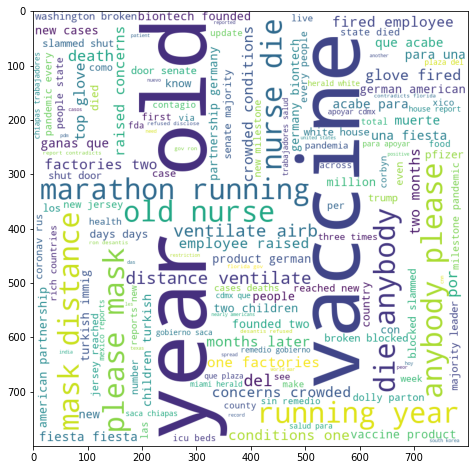

In [16]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud1)
plt.show()

**word cloud**

In [17]:
all_terms = word_tokenize(tweets_combined_clean)
fdist = FreqDist(all_terms)

In [18]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

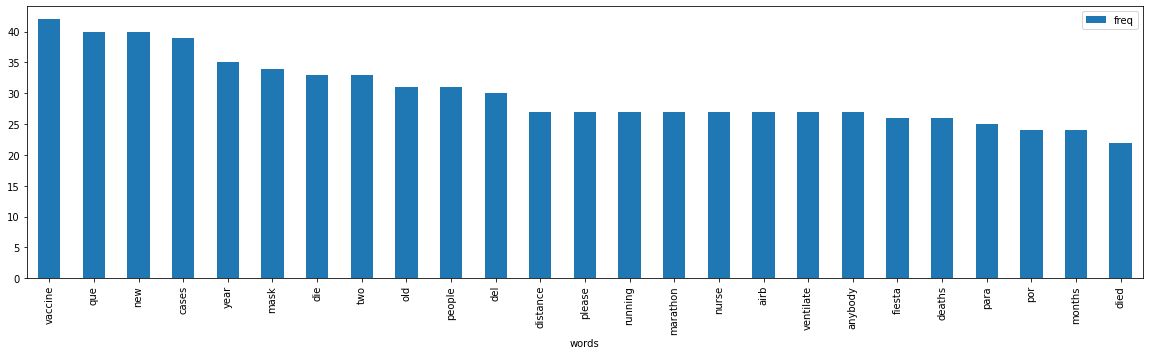

In [19]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

**most used terms  in text**

In [20]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
senti = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Using vader to predict the sentiment scores**

In [21]:
def get_sentiment_vader(tweet):
    return senti.polarity_scores(tweet)['compound']

In [22]:
senti_score = [get_sentiment_vader(txt) for txt in s.clean_tweet.values]

In [23]:
senti_score[:5]

[0.0, -0.0516, 0.0, -0.3818, 0.4404]

**plotting the graph**

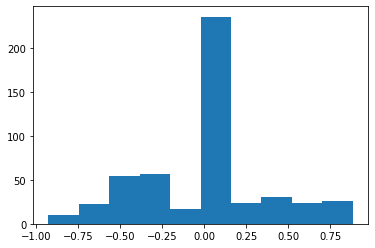

In [24]:
plt.hist(senti_score)
plt.show()

**classifing as positive,negative or neutral**

In [25]:
def get_sentiment(tweet):
    polarity=senti.polarity_scores(tweet)
    if(polarity['compound']>=0.05):
        return "Positive"
    elif(polarity['compound']<=-0.05):
        return "Negative"
    else:
        return "Neutral"

In [26]:
s['sentiment'] = s.clean_tweet.apply(get_sentiment)

**Reading the df again with sentiment prediction**

In [27]:
s.head()

,text,clean_tweet,sentiment
0,@HHPumpco_BCE_II Coronavirus 2020 is over back...,bce 2020 back normal baybeeeeee,Neutral
1,"RT @Bots_Wanna: This is true, we had the vacci...",wanna true vaccine january china even admitted...,Negative
2,"RT @RebeccaRambar: Le chef de l'ONU, Antonio G...",chef onu antonio guterres exhort les dirigeant...,Neutral
3,RT @DrEricDing: ➡️ If a marathon-running 29-ye...,marathon running year old nurse die anybody pl...,Negative
4,GOP Congressman-elect calls the coronavirus pa...,gop congressman elect calls pandemic phony ral...,Positive


In [28]:
distr = s.sentiment.value_counts(normalize=True)
distr

Neutral     0.464
Negative    0.318
Positive    0.218
Name: sentiment, dtype: float64

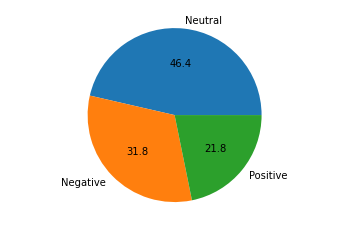

In [29]:
fig, ax = plt.subplots(); ax.axis("equal")
ax.pie(distr.values,labels=list(distr.keys()),autopct='%1.1f')
plt.show()

**pie chart for clssification**

In [30]:
pos_tweets = s.clean_tweet[s.sentiment=='Positive']

pos_tweets[:5]

4     gop congressman elect calls pandemic phony ral...
7     workers sue north carolina keep safe job amy lieu
10                                              support
12    like president trump associates received drugs...
16    dolly parton saved year old star oncoming traf...
Name: clean_tweet, dtype: object

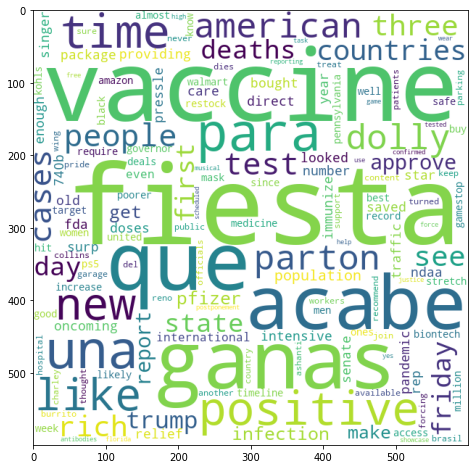

In [31]:
stop_nltk = stopwords.words("english")
word_cloud=WordCloud(width=600,height=600,background_color='white',stopwords=stop_nltk,max_words=150,normalize_plurals=True,collocations=False).generate_from_text(" ".join(pos_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

**word cloud for positive tweets**

# Negative tweets

In [32]:
neg_tweets = s.clean_tweet[s.sentiment=='Negative']
neg_tweets[5:10]

11    ten months million global deaths later nurses ...
13    washington broken blocked slammed shut door se...
17    grinspoon sars cov2 induced respiratory distre...
18    many deaths take til knows many people died an...
27    new jersey reached new milestone pandemic ever...
Name: clean_tweet, dtype: object

In [33]:
neg_tweets_combined = " ".join(neg_tweets.values)

In [34]:
neg_tweets_combined[:500]

'wanna true vaccine january china even admitted real threat cor marathon running year old nurse die anybody please mask distance ventilate airb marathon running year old nurse die anybody please mask distance ventilate airb holding public meetings political mistake putting liv nearly 292 000 americans lost lives combat world war today killed ten months million global deaths later nurses doctors continue risk lives every day washington broken blocked slammed shut door senate majority leader grinsp'

**word cloud for negative tweets**

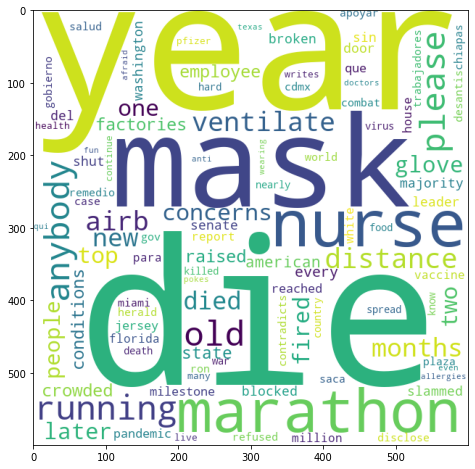

In [35]:
word_cloud=WordCloud(width=600,height=600,stopwords= stop_nltk,background_color='white',max_words=100,normalize_plurals=True,collocations=False).generate_from_text(" ".join(neg_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

*Converting in to numeric type type*

In [36]:
def get_sentiment_score(tweet):
    polarity=senti.polarity_scores(tweet)
    if(polarity['compound']>=0.05):
        return 1
    elif(polarity['compound']<=-0.05):
        return -1
    else:
        return 0
s['sentiment_score'] = s.clean_tweet.apply(get_sentiment_score)

In [37]:
s.head()

,text,clean_tweet,sentiment,sentiment_score
0,@HHPumpco_BCE_II Coronavirus 2020 is over back...,bce 2020 back normal baybeeeeee,Neutral,0
1,"RT @Bots_Wanna: This is true, we had the vacci...",wanna true vaccine january china even admitted...,Negative,-1
2,"RT @RebeccaRambar: Le chef de l'ONU, Antonio G...",chef onu antonio guterres exhort les dirigeant...,Neutral,0
3,RT @DrEricDing: ➡️ If a marathon-running 29-ye...,marathon running year old nurse die anybody pl...,Negative,-1
4,GOP Congressman-elect calls the coronavirus pa...,gop congressman elect calls pandemic phony ral...,Positive,1


**Builiding a model**

In [38]:
X_text = s.clean_tweet.values
y = s.sentiment_score

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_text,y,test_size=0.20,
                                                 random_state=42)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=3500)

In [41]:
#Extract the features which are only going to be used for training
#Apply the transformation on those extracted features
X_train = count_vect.fit_transform(X_train)

In [42]:
#For the words used for training, apply the transformation on the test set
#If there are new words in the test set, we are just ignoring them
X_test = count_vect.transform(X_test)

In [43]:
print(X_train.shape, X_test.shape)

(400, 1741) (100, 1741)


In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
nb = MultinomialNB()

In [46]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
y_test_pred = nb.predict(X_test)

In [48]:
accuracy_score(y_test, y_test_pred)

0.79

In [49]:
# KNN 

**knn classifier**

In [50]:
from sklearn import neighbors as nb
clf=nb.KNeighborsClassifier(n_neighbors=2,n_jobs=-1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.72

# RNN

In [51]:
X=s.clean_tweet.values
y=s.sentiment_score

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [53]:
from tensorflow.keras.preprocessing.text import one_hot
voc_size=5000
X_train=[one_hot(words,voc_size)for words in X_train] 
X_test=[one_hot(words,voc_size)for words in X_test]

In [54]:
from tensorflow.keras import preprocessing

In [55]:
preprocessing.sequence.pad_sequences

<function tensorflow.python.keras.preprocessing.sequence.pad_sequences>

In [56]:
max_len=200
X_train=preprocessing.sequence.pad_sequences(X_train,maxlen=max_len)
X_test=preprocessing.sequence.pad_sequences(X_test,maxlen=max_len)

In [57]:
print(len(X_train))
print(len(X_test))
print(type(X_train))
print(type(X_test))


400
100
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [58]:
import numpy as np
import tensorflow as tf

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Flatten,Embedding,Dropout,SpatialDropout1D

In [61]:
model_rnn = Sequential()
model_rnn.add(Embedding(voc_size, output_dim=32))
model_rnn.add(SpatialDropout1D(0.4))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(0.4))
model_rnn.add(Dense(1,activation="sigmoid"))
model_rnn.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])


In [62]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          160000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 32)          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 162,113
Trainable params: 162,113
Non-trainable params: 0
_________________________________________________________________


In [63]:
history_rnn = model_rnn.fit(X_train,y_train,batch_size=128,validation_split=0.2,epochs=50)

Epoch 1/50
3/3 [==============================] - 2s 423ms/step - loss: 0.5376 - accuracy: 0.4037 - val_loss: 0.2527 - val_accuracy: 0.4500
Epoch 2/50
3/3 [==============================] - 0s 67ms/step - loss: 0.1413 - accuracy: 0.4598 - val_loss: 0.1247 - val_accuracy: 0.4500
Epoch 3/50
3/3 [==============================] - 0s 68ms/step - loss: -0.0184 - accuracy: 0.4658 - val_loss: 0.0545 - val_accuracy: 0.4500
Epoch 4/50
3/3 [==============================] - 0s 65ms/step - loss: -0.1285 - accuracy: 0.4809 - val_loss: -0.0042 - val_accuracy: 0.4500
Epoch 5/50
3/3 [==============================] - 0s 64ms/step - loss: -0.2210 - accuracy: 0.4564 - val_loss: -0.0493 - val_accuracy: 0.4500
Epoch 6/50
3/3 [==============================] - 0s 64ms/step - loss: -0.3168 - accuracy: 0.4773 - val_loss: -0.0849 - val_accuracy: 0.4500
Epoch 7/50
3/3 [==============================] - 0s 67ms/step - loss: -0.3428 - accuracy: 0.4770 - val_loss: -0.1153 - val_accuracy: 0.4500
Epoch 8/50
3/3 [=

In [64]:
y_test_pred = model_rnn.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [65]:
model_rnn.evaluate(X_test,y_test)

4/4 [==============================] - 0s 9ms/step - loss: -1.5287 - accuracy: 0.5200


[-1.5286747217178345, 0.5199999809265137]

# LSTM

In [66]:
from tensorflow.keras.layers import LSTM

In [67]:
from keras.models import Sequential
from keras.layers import Embedding
model_lstm = Sequential()
model_lstm.add(Embedding(voc_size, output_dim=32))
model_lstm.add(SpatialDropout1D(0.4))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.compile(loss = 'binary_crossentropy',
                  optimizer = "rmsprop",
                  metrics=['accuracy'])

In [68]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 32)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________


In [69]:
history_lstm = model_lstm.fit(X_train,y_train,batch_size=128,validation_split=0.2,epochs=25)

Epoch 1/25
3/3 [==============================] - 3s 359ms/step - loss: 0.6782 - accuracy: 0.3848 - val_loss: 0.6324 - val_accuracy: 0.4500
Epoch 2/25
3/3 [==============================] - 0s 123ms/step - loss: 0.5963 - accuracy: 0.4643 - val_loss: 0.4961 - val_accuracy: 0.4500
Epoch 3/25
3/3 [==============================] - 0s 134ms/step - loss: 0.3708 - accuracy: 0.4633 - val_loss: 0.0257 - val_accuracy: 0.4500
Epoch 4/25
3/3 [==============================] - 0s 121ms/step - loss: -0.2318 - accuracy: 0.4809 - val_loss: -0.0842 - val_accuracy: 0.4500
Epoch 5/25
3/3 [==============================] - 0s 122ms/step - loss: -0.3841 - accuracy: 0.4564 - val_loss: -0.1093 - val_accuracy: 0.4500
Epoch 6/25
3/3 [==============================] - 0s 123ms/step - loss: -0.5683 - accuracy: 0.4799 - val_loss: -0.1234 - val_accuracy: 0.4500
Epoch 7/25
3/3 [==============================] - 0s 124ms/step - loss: -0.5236 - accuracy: 0.4770 - val_loss: -0.1341 - val_accuracy: 0.4500
Epoch 8/25
3

In [70]:
model_lstm.evaluate(X_test,y_test)

4/4 [==============================] - 0s 13ms/step - loss: -1.0276 - accuracy: 0.4700


[-1.02755606174469, 0.4699999988079071]